<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LesivGamers\AppData\Local\Temp\ipykernel_13124\1388069895.py:6: SyntaxWarning: invalid escape sequence '\P'
  sber_data = pd.read_csv('F:\Python\DS2025\DS_lesiv\PY14-Очистка данных\data\sber_data.csv')


<Axes: xlabel='kremlin_km', ylabel='price_doc'>

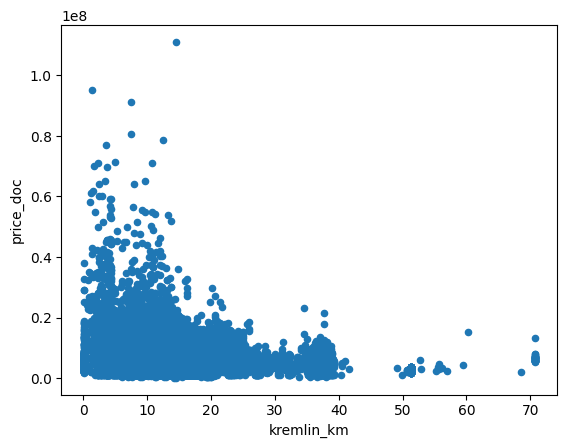

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('F:\Python\DS2025\DS_lesiv\PY14-Очистка данных\data\sber_data.csv')
sber_data.head()
sber_data.tail()

sber_data.plot(x= 'kremlin_km', y= 'price_doc', kind= 'scatter')


In [19]:
display(sber_data.isnull().tail())
cols_null_percent = sber_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

<Axes: title={'center': 'Распределение пропусков в данных'}>

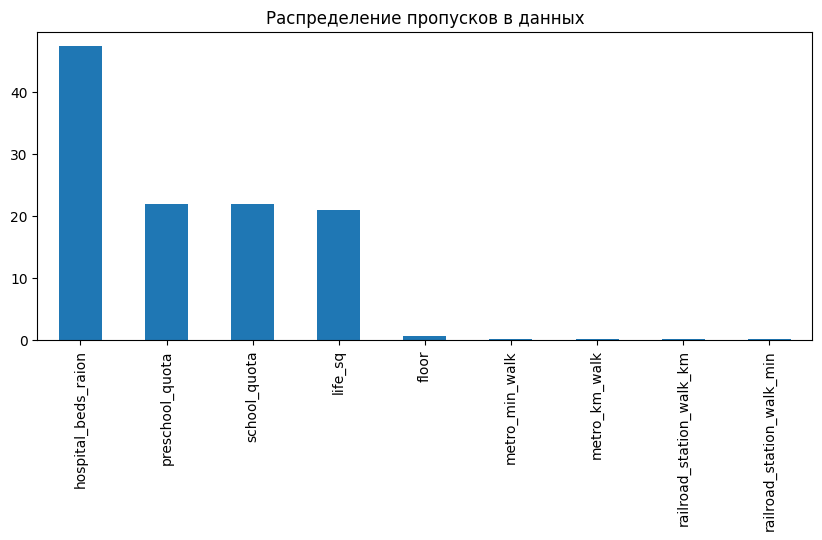

In [20]:
cols_with_null.plot(
    kind= 'bar',
    figsize= (10,4),
    title='Распределение пропусков в данных'
)

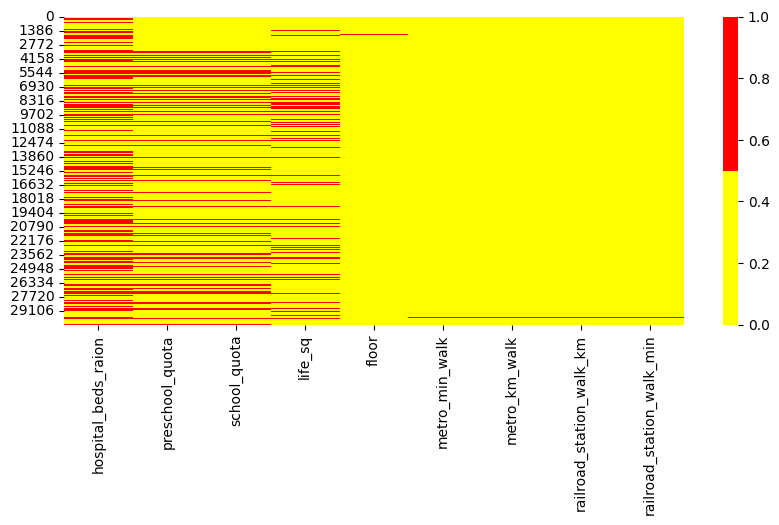

In [21]:
colors = ['yellow', 'red']
fig= plt.figure(figsize=(10,4))
cols= cols_with_null.index
ax= sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [22]:
drop_data = sber_data.copy() #создаем копию исходной таблицы
thresh = drop_data.shape[0]*0.7 #задаем минимальный порог: вычисляем 70% от числа строк
drop_data = drop_data.dropna(thresh=thresh, axis= 1)  #удаляем столбцы, в которых более 30% пропусков
drop_data = drop_data.dropna(how='any', axis=0)  #удаляем записи, в которых есть хотя бы один пропуск
drop_data.isnull().mean()  #отображаем результирующую долю пропусков
print(drop_data.shape)

(20888, 60)


array([[<Axes: title={'center': 'hospital_beds_raion'}>,
        <Axes: title={'center': 'preschool_quota'}>,
        <Axes: title={'center': 'school_quota'}>],
       [<Axes: title={'center': 'life_sq'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'metro_min_walk'}>],
       [<Axes: title={'center': 'metro_km_walk'}>,
        <Axes: title={'center': 'railroad_station_walk_km'}>,
        <Axes: title={'center': 'railroad_station_walk_min'}>]],
      dtype=object)

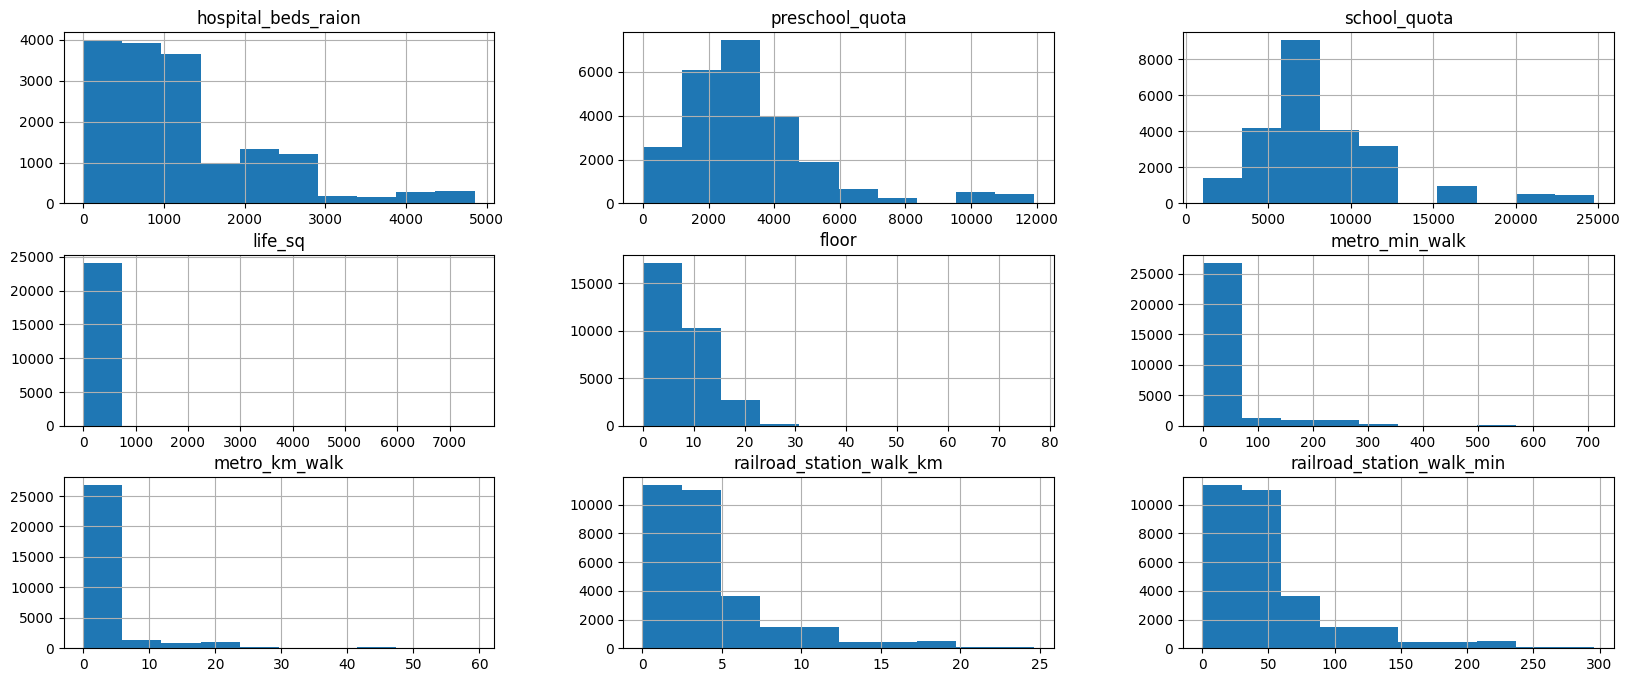

In [23]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8))

In [28]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

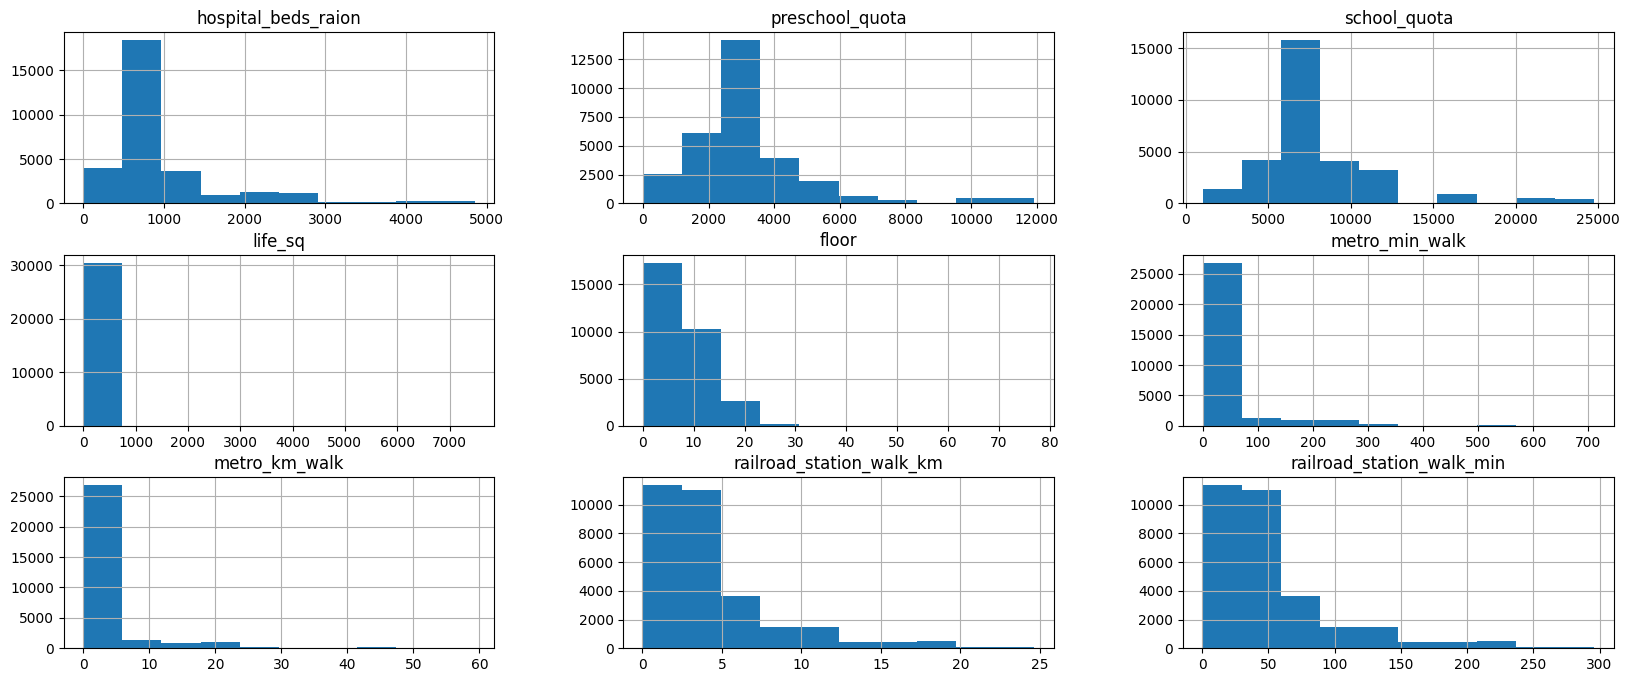

In [31]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));